# Определение перспективного тарифа для телеком-компании

## Описание проекта:

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов:

**Тариф «Смарт»:**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
   

**Тариф «Ультра»:**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

### Описание данных:

**Таблица users (информация о пользователях):**
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tarif* — название тарифного плана

**Таблица calls (информация о звонках):**

- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

#### Примечание:

*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.*


*Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Хорошая практика начинать проект с контекста, описания задачи, возможного хода\плана исследования, а также описания имеющихся данных. Очень надеюсь, что ты будешь уделять этому внимание и в последующих проектах</div>




## Изучение данных из файла:

### Импорт библиотек и чтение фалов:

In [1]:
# Импорт библиотек:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from math import ceil

from math import factorial
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
# Чтение файлов:

try:
    data_calls = pd.read_csv(
        '/home/saxofon/Документы/jupdata/calls.csv')
    data_internet = pd.read_csv(
        '/home/saxofon/Документы/jupdata/internet.csv')
    data_messages = pd.read_csv(
        '/home/saxofon/Документы/jupdata/messages.csv')
    data_tariffs = pd.read_csv(
        '/home/saxofon/Документы/jupdata/tariffs.csv')
    data_users = pd.read_csv(
        '/home/saxofon/Документы/jupdata/users.csv')
except:
    data_calls = pd.read_csv(
        '/datasets/calls.csv')
    data_internet = pd.read_csv(
        '/datasets/internet.csv')
    data_messages = pd.read_csv(
        '/datasets/messages.csv')
    data_tariffs = pd.read_csv(
        '/datasets/tariffs.csv')
    data_users = pd.read_csv(
        '/datasets/users.csv')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> 🔥🔥🔥</div>




### Обзор "users" (информация о пользователях):

In [3]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [6]:
print(data_users.groupby('city').size().to_dict())

print('Всего городов:', len(data_users['city'].unique()))
print("Число дубликатов:", data_users.duplicated().sum())

{'Архангельск': 1, 'Астрахань': 4, 'Балашиха': 5, 'Барнаул': 3, 'Белгород': 2, 'Брянск': 3, 'Владивосток': 5, 'Владикавказ': 2, 'Владимир': 3, 'Волгоград': 8, 'Волжский': 2, 'Вологда': 7, 'Воронеж': 6, 'Грозный': 2, 'Екатеринбург': 11, 'Иваново': 1, 'Ижевск': 2, 'Иркутск': 6, 'Казань': 14, 'Калининград': 2, 'Калуга': 4, 'Кемерово': 2, 'Киров': 6, 'Кострома': 4, 'Краснодар': 11, 'Красноярск': 7, 'Курган': 3, 'Курск': 2, 'Липецк': 2, 'Магнитогорск': 5, 'Махачкала': 5, 'Москва': 99, 'Мурманск': 4, 'Набережные Челны': 11, 'Нижневартовск': 1, 'Нижний Новгород': 8, 'Нижний Тагил': 3, 'Новокузнецк': 7, 'Новороссийск': 4, 'Новосибирск': 16, 'Омск': 14, 'Оренбург': 2, 'Орёл': 3, 'Пенза': 6, 'Пермь': 8, 'Петрозаводск': 4, 'Подольск': 1, 'Ростов-на-Дону': 6, 'Рязань': 4, 'Самара': 9, 'Санкт-Петербург': 39, 'Саранск': 4, 'Саратов': 3, 'Севастополь': 3, 'Смоленск': 2, 'Сочи': 6, 'Ставрополь': 5, 'Стерлитамак': 3, 'Сургут': 2, 'Тамбов': 2, 'Тверь': 3, 'Тольятти': 4, 'Томск': 6, 'Тула': 2, 'Тюмень': 

#### Промежуточный вывод:

- Больше всего пользователей из СПБ и МСК, что ожидаемо.
- Повторов и явных дубликатов не обнаружено.
- Пропуски есть только в "churn_date", судя по описанию, это те пользователи, тариф которых ещё действует, потому оставим данные как есть.
- reg_date нужно далее привести в datatime
- Данные выглядят нормально.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Хорошее начало, информация о данных изучена👍</div>

### Обзор "calls" (информация о звонках):

In [7]:
data_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Есть нулевые звонки, определим далее как их много:

<AxesSubplot:ylabel='Frequency'>

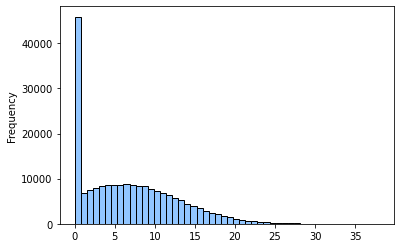

In [10]:
plt.style.use('seaborn-pastel')
data_calls['duration'].plot(kind='hist', ec='black', bins=50)

In [11]:
len(data_calls.query('0 < duration <= 0.9'))

7542

Из описания задания: *«Мегалайн» всегда округляет секунды до минут*. Если бы пользователи поговорили 1 секунду, им бы засчиталась 1 минута, значит можно далее округлить значения, что мы и сделаем. Скорее всего пропуски связаны с обрывами связи, или сбросами звонка.

#### Промежуточный вывод:

- Множество околонулевых значений, далее разберёмся с ними в предобработке данных.
- call_date в datatime

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Все верно👍</div>

### Обзор "messages" (информация о сообщениях):

In [12]:
data_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Промежуточный вывод:

- С данными всё в порядке.
- message_date заменим на datatime

### Обзор "internet" (информация об интернет-сессиях):

In [14]:
data_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [16]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Также множество околонулевых значений, проверим сколько их всего:

<AxesSubplot:ylabel='Frequency'>

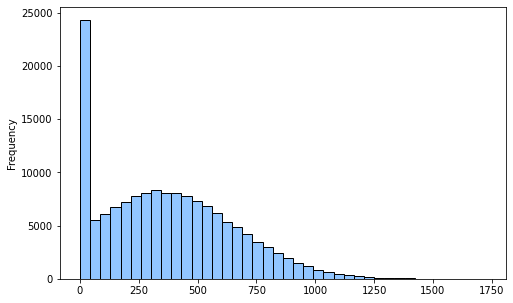

In [17]:
data_internet['mb_used'].plot(kind='hist', ec='black', bins=40, figsize=(8, 5))

In [18]:
print('Всего 0 значений:', len(data_internet.query('mb_used == 0')))

Всего 0 значений: 19598


#### Промежуточный вывод:

- Избавимся далее от 0 значений, по всей видимости, это также сессии которые не были подключены, возможно из-за обрыва связи.
- session_date приведём в формат datatime
- Также имеется лишний столбец 'Unnamed: 0', по всей видимости, который является дубликатом столбца index. Мог появиться из-за наличия индексов в самом файле, столбец стоит удалить

### Обзор tariffs (информация о тарифах):

In [19]:
data_tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Промежуточный вывод:

- Все данные стандартны, и соответствуют информации полученной в описании данных

### Общий вывод:

**Таблица users:**
    
    - reg_date в datatime.

**Таблица calls:**

    - Удалим нулевые значения.
    - call_date в datatime.

**Таблица message:**

    - message_date в datatime

**Таблица internet:**
    
    - Удалим нулевые значения.
    - session_date в datatime
    - Удалим столбец "Unnamed: 0"
    
**Все таблицы:**

    - Сменим тип данных на 32 bit, для облегчения таблицы.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Отлично, мы подробно посмотрели на данные. Теперь понятно, с чем будем работать😉</div>



## Предобработка данных:

### Удалим нулевые значения:

#### Таблица calls:

In [21]:
# Округлим значения:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)
display(data_calls.head())
print('Нулевых значений:', len(data_calls.query('duration == 0.0')))

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Нулевых значений: 39613


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Все верно👍 Функцию np.ceil() можно применять без apply😉</div>





<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Не особо разобрался, как это делать. Если есть ссылка где можно почитать, буду благодарен :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 
    
[Вот ссылка на документацию](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html)
    
А сделать это можно так:

In [22]:
# Код ревьюера
#df['column'] = np.ceil(df['columns'])

Так как эти 0 не расходуют минуты и не нужны для нашего задания, удалим ненужные строки:

In [23]:
# Удаляем значения:
data_calls['duration'] = data_calls['duration'].replace(0, np.NaN)
data_calls = data_calls.dropna()

print('Нулевых значений:', len(data_calls.query('duration == 0.0')))
data_calls.info()

Нулевых значений: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         162994 non-null  object 
 1   call_date  162994 non-null  object 
 2   duration   162994 non-null  float64
 3   user_id    162994 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Успешно, посмотрим визуально:

<function matplotlib.pyplot.show(close=None, block=None)>

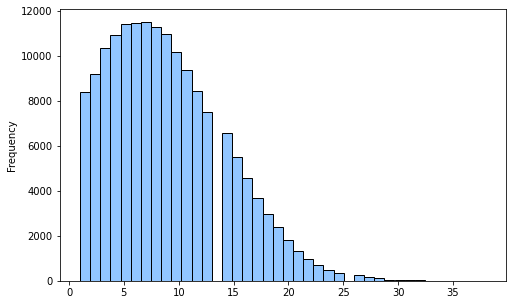

In [24]:
data_calls['duration'].plot(kind='hist', ec='black', bins=40, figsize=(8, 5))
plt.show

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> 👍</div>





#### Таблица internet:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> По поводу мегабайтов в задании сказано - Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Значит на этом этапе никаких округлений делать не нужно. Нужно будет округлить до целого вверх на этапе подсчета потраченных пользователем гигабайтов за месяц</div>





<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Убрал округление :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Теперь согласен👍

Удалим строки:

In [25]:
# Удаляем значения:
data_internet['mb_used'] = data_internet['mb_used'].replace(0, np.NaN)
data_internet = data_internet.dropna()
del data_internet['Unnamed: 0']

print('Нулевых значений:', len(data_internet.query('mb_used == 0.0')))
data_internet.info()

Нулевых значений: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            129798 non-null  object 
 1   mb_used       129798 non-null  float64
 2   session_date  129798 non-null  object 
 3   user_id       129798 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Unnamed: 0 возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column). Если при чтении указать этот столбец pd.read_csv(..., index_col=0) - данные сразу прочитаются корректно.</div>




Визуализируем:

<AxesSubplot:ylabel='Frequency'>

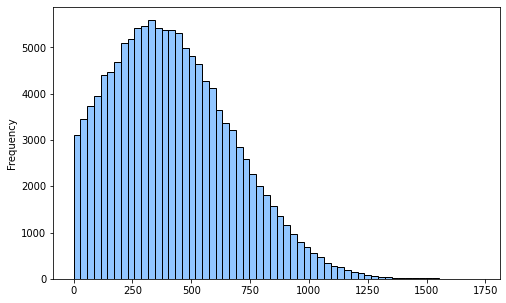

In [26]:
data_internet['mb_used'].plot(kind='hist', ec='black', bins=60, figsize=(8, 5))

Успешно удалили значения.

### datatime:

In [27]:
# Функция, добавляющая месяц и сменяющая формат:
def date_to_month(data):
    for df in data:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                df['month'] = df[column].apply(lambda x: x.month)

In [28]:
# Применим функцию:
date_to_month([data_users, data_calls, data_messages, data_internet])

display(data_users.info())
print()
display(data_calls.info())
print()
display(data_messages.info())
print()
display(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.3+ KB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  float64       
 3   user_id    162994 non-null  int64         
 4   month      162994 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.5+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int64         
 4   month         129798 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.9+ MB


None

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Все верно👍</div>

### Сменим тип данных:

In [29]:
# Таблица data_users
data_users['user_id'] = data_users['user_id'].astype('int32')
data_users['age'] = data_users['age'].astype('int32')
data_users['month'] = data_users['month'].astype('int32')

# Таблица data_calls
data_calls['duration'] = data_calls['duration'].astype('float32')
data_calls['user_id'] = data_calls['user_id'].astype('int32')
data_calls['month'] = data_calls['month'].astype('int32')

# Таблица data_messages:
data_messages['user_id'] = data_messages['user_id'].astype('int32')
data_messages['month'] = data_messages['month'].astype('int32')

# Таблица data_internet:
data_internet['mb_used'] = data_internet['mb_used'].astype('float32')
data_internet['user_id'] = data_internet['user_id'].astype('int32')
data_internet['month'] = data_internet['month'].astype('int32')

# Проверка результатов:
display(data_users.info())
print()
display(data_calls.info())
print()
display(data_messages.info())
print()
display(data_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int32         
 1   age         500 non-null    int32         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(5)
memory usage: 29.4+ KB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         162994 non-null  object        
 1   call_date  162994 non-null  datetime64[ns]
 2   duration   162994 non-null  float32       
 3   user_id    162994 non-null  int32         
 4   month      162994 non-null  int32         
dtypes: datetime64[ns](1), float32(1), int32(2), object(1)
memory usage: 5.6+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int32         
 3   month         123036 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 2.8+ MB


None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            129798 non-null  object        
 1   mb_used       129798 non-null  float32       
 2   session_date  129798 non-null  datetime64[ns]
 3   user_id       129798 non-null  int32         
 4   month         129798 non-null  int32         
dtypes: datetime64[ns](1), float32(1), int32(2), object(1)
memory usage: 4.5+ MB


None

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Согласен👍</div>

### Посчитаем для каждого пользователя:
- Количество сделанных звонков и израсходованных минут разговора по месяцам.
- Количество отправленных сообщений по месяцам.
- Объем израсходованного интернет-трафика по месяцам.
- Ежемесячную выручку с каждого пользователя.

#### Количество сделанных звонков и израсходованных минут разговора по месяцам:

In [30]:
# Создадим сводную таблицу
pivot_calls = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
# Переименуем столбцы
pivot_calls.columns=['calls count', 'calls duration']
pivot_calls

calls count  calls duration
user_id month                             
1000    5               17           159.0
        6               28           172.0
        7               41           340.0
        8               42           408.0
        9               46           466.0
...                    ...             ...
1498    10              30           247.0
1499    9                8            70.0
        10              44           449.0
        11              62           612.0
        12              56           492.0

[3168 rows x 2 columns]

#### Количество отправленных сообщений по месяцам:

In [31]:
pivot_messages = data_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
pivot_messages.columns=['messages count']
pivot_messages

messages count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам:

In [32]:
pivot_internet = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
pivot_internet.columns=['mb sum']
pivot_internet

mb sum
user_id month              
1000    5       2253.489990
        6      23233.769531
        7      14003.639648
        8      14055.929688
        9      14568.910156
...                     ...
1498    10     20579.359375
1499    9       1845.750000
        10     17788.509766
        11     17963.310547
        12     13055.580078

[3201 rows x 1 columns]

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Все верно👍 </div>





#### Объединение таблиц:

In [33]:
# Создадим одну сводную таблицу, соединив прошлые:
data_pivot = pivot_calls.join([pivot_internet, pivot_messages], how='outer')
data_pivot.head(10)

calls count  calls duration        mb sum  messages count
user_id month                                                           
1000    5             17.0           159.0   2253.489990            22.0
        6             28.0           172.0  23233.769531            60.0
        7             41.0           340.0  14003.639648            75.0
        8             42.0           408.0  14055.929688            81.0
        9             46.0           466.0  14568.910156            57.0
        10            44.0           350.0  14702.490234            73.0
        11            37.0           338.0  14756.469727            58.0
        12            38.0           333.0   9817.610352            70.0
1001    11            45.0           430.0  18429.339844             NaN
        12            47.0           414.0  14036.660156             NaN

In [34]:
# Добавим тарифы и информацию о городе:
data_pivot = data_pivot.join(data_users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='outer')
data_pivot = data_pivot.join(data_users.loc[:,['user_id', 'city']].set_index('user_id'), how='outer')
data_pivot.head(10)

calls count  calls duration        mb sum  messages count  \
user_id month                                                              
1000    5             17.0           159.0   2253.489990            22.0   
        6             28.0           172.0  23233.769531            60.0   
        7             41.0           340.0  14003.639648            75.0   
        8             42.0           408.0  14055.929688            81.0   
        9             46.0           466.0  14568.910156            57.0   
        10            44.0           350.0  14702.490234            73.0   
        11            37.0           338.0  14756.469727            58.0   
        12            38.0           333.0   9817.610352            70.0   
1001    11            45.0           430.0  18429.339844             NaN   
        12            47.0           414.0  14036.660156             NaN   

              tariff       city  
user_id month                    
1000    5      ultra  Краснодар  
        6      ultra  Краснодар  
        7      ultra  Краснодар  
        8      ultra  Краснодар  
        9      ultra  Краснодар  
        10     ultra  Краснодар  
        11     ultra  Краснодар  
        12     ultra  Краснодар  
1001    11     smart     Москва  
        12     smart     Москва

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Отлично, объединение таблиц проведено верно🔥</div>

Успешное объединение таблиц, есть NaN, по всей видимости это связано с тем, что не все люди пользуются смс/звонками/интернетом в том или ином месяце, заполним их нулями, так как на дальнейшие расчёты это не повлияет.

In [35]:
data_pivot.fillna(0, inplace=True)
print(data_pivot.isnull().sum())
print()
display(data_pivot.describe())
print()
data_pivot.info()

calls count       0
calls duration    0
mb sum            0
messages count    0
tariff            0
city              0
dtype: int64



,calls count,calls duration,mb sum,messages count
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,50.713752,451.244873,17207.613281,38.281269
std,26.951413,241.909973,7570.958496,36.148326
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,282.000000,12491.890137,9.000000
50%,50.000000,443.000000,16943.175781,30.000000
75%,66.000000,589.000000,21424.625000,57.000000
max,190.000000,1673.000000,49745.691406,224.000000



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   calls count     3214 non-null   float64
 1   calls duration  3214 non-null   float32
 2   mb sum          3214 non-null   float32
 3   messages count  3214 non-null   float64
 4   tariff          3214 non-null   object 
 5   city            3214 non-null   object 
dtypes: float32(2), float64(2), object(2)
memory usage: 155.5+ KB


In [36]:
# Сменим тип данных:
data_pivot['calls count'] = data_pivot['calls count'].astype('float32')
data_pivot['messages count'] = data_pivot['messages count'].astype('float32')

data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   calls count     3214 non-null   float32
 1   calls duration  3214 non-null   float32
 2   mb sum          3214 non-null   float32
 3   messages count  3214 non-null   float32
 4   tariff          3214 non-null   object 
 5   city            3214 non-null   object 
dtypes: float32(4), object(2)
memory usage: 130.4+ KB


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Согласен👍

#### Помесячная выручка с каждого пользователя:

Напишем функцию, которая нам поможет рассчитать это. Для расчета нужно будет: вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану.

In [37]:
def total_revenue(row):
# Присвоим значения конкретных строк:
    calls_count = row['calls count']
    calls_duration = row['calls duration']
    mb_sum = row['mb sum']
    messages_count = row['messages count']
    tariff = row['tariff']
# Стоимость и лимиты для тарифов:
    mgb_all = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['mb_per_month_included'])
    msg_all = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['messages_included'])
    min_all = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['minutes_included'])
    payment_per_month = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['rub_monthly_fee'])
    gb_price = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['rub_per_gb'])
    message_price = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['rub_per_message'])
    minute_price = int(data_tariffs.loc[data_tariffs.loc[:,'tariff_name'] == tariff]['rub_per_minute'])
# Переменные для перерасхода траф. звонков и сообщений
    over_mb = 0
    over_calls = 0
    over_msg = 0
# Посчитаем, сколько рублей заплатим за доп. трафик округлив в большую сторону, по ТЗ нам это позволяется:
    if mb_sum > mgb_all:
        over_mb = ceil((mb_sum - mgb_all) / 1024) * gb_price
# За доп. собщения:
    if messages_count > msg_all:
        over_msg = (messages_count - msg_all) * message_price
# За доп. звонки:
    if calls_duration > min_all:
        over_calls = (calls_duration - min_all) * minute_price
# Считаем выручку, добавив месячную плату.
    return over_mb + over_msg + over_calls + payment_per_month

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Функция написана верно, но если быть точным: в гигабайте содержится 1024 мегабайта
    
</div>







<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Поправил функцию :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 👍

In [38]:
# Применим функцию:
data_pivot['total revenue'] = data_pivot.apply(total_revenue, axis = 1)

data_pivot.head(10)

calls count  calls duration        mb sum  messages count  \
user_id month                                                              
1000    5             17.0           159.0   2253.489990            22.0   
        6             28.0           172.0  23233.769531            60.0   
        7             41.0           340.0  14003.639648            75.0   
        8             42.0           408.0  14055.929688            81.0   
        9             46.0           466.0  14568.910156            57.0   
        10            44.0           350.0  14702.490234            73.0   
        11            37.0           338.0  14756.469727            58.0   
        12            38.0           333.0   9817.610352            70.0   
1001    11            45.0           430.0  18429.339844             0.0   
        12            47.0           414.0  14036.660156             0.0   

              tariff       city  total revenue  
user_id month                                   
1000    5      ultra  Краснодар         1950.0  
        6      ultra  Краснодар         1950.0  
        7      ultra  Краснодар         1950.0  
        8      ultra  Краснодар         1950.0  
        9      ultra  Краснодар         1950.0  
        10     ultra  Краснодар         1950.0  
        11     ultra  Краснодар         1950.0  
        12     ultra  Краснодар         1950.0  
1001    11     smart     Москва         1150.0  
        12     smart     Москва          550.0

In [39]:
display(data_pivot.isnull().sum())
print()
data_pivot.describe()

calls count       0
calls duration    0
mb sum            0
messages count    0
tariff            0
city              0
total revenue     0
dtype: int64

,calls count,calls duration,mb sum,messages count,total revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,50.713753,451.244873,17207.613281,38.281269,1529.076229
std,26.951412,241.909973,7570.958496,36.148327,798.251091
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,32.000000,282.000000,12491.890137,9.000000,750.000000
50%,50.000000,443.000000,16943.175781,30.000000,1653.500000
75%,66.000000,589.000000,21424.625000,57.000000,1950.000000
max,190.000000,1673.000000,49745.691406,224.000000,6770.000000


Успешно посчитали и применили функцию, нет 0 значений, таблица выглядит правдоподобно, можно приступать к анализу.

## Анализ данных:

Опишем поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

### Минуты, сообщения и объём трафика в месяц:

In [40]:
# Создадим сводную таблицу:
data_medians = data_pivot.pivot_table(index='user_id', 
                        values=['calls duration', 'mb sum', 'messages count'], 
                        aggfunc='median')

# Добавим в таблицу тарифы:
data_medians = data_medians.join(data_users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='outer')
data_medians.head(10)

,calls duration,mb sum,messages count,tariff
user_id,,,,
1000,339.0,14312.419922,65.0,ultra
1001,422.0,16233.000000,0.0,smart
1002,214.0,17580.099609,11.0,smart
1003,824.0,11356.889648,83.0,ultra
1004,132.5,17810.529297,154.5,ultra
1005,593.5,7833.229980,49.0,smart
1006,356.0,15521.530273,0.0,smart
1007,480.0,14427.330078,26.0,smart
1008,339.0,13217.139648,56.0,smart


Уже по этим данным можно заметить, что разные пользователи совершенно по-разному пользуются услугами оператора, и платят за это не всегда ровно столько, сколько стоит тариф.

### Посчитаем среднее количество, дисперсию и стандартное отклонение:

In [41]:
# Сводная таблица по тарифам:
stat = data_pivot.pivot_table(index=['tariff'], values=['calls duration', 'mb sum', 'messages count'], 
                    aggfunc={'calls duration': [np.mean, np.median, np.var, np.std], 
                             'mb sum': [np.mean, np.median, np.var, np.std], 
                             'messages count': [np.mean, np.median, np.var, np.std]})

# Округлим значения до 1 знака после запятой:
stat.applymap("{:.1f}".format)

calls duration                           mb sum                    \
                 mean median    std       var     mean   median      std   
tariff                                                                     
smart           417.9  422.0  190.3   36219.3  16208.4  16506.8   5870.5   
ultra           526.6  518.0  317.6  100873.6  19468.8  19308.0  10087.2   

                    messages count                       
                var           mean median   std     var  
tariff                                                   
smart    34462496.0           33.4   28.0  28.2   796.8  
ultra   101751016.0           49.4   38.0  47.8  2285.3

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Тут не совсем верно, сначала ты группируешь данные на юзера, находишь для каждого показателя медиану, а потом ищешь среднее, стандартное отклонение и дисперсию от этих медиан. В нашем случае будет правильнее считать показатели на данных в агрегации на пользователя и месяц (таблица data_pivot)


    
</div>





<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Поправил сводную таблицу, обновил выводы :)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Теперь верно

Можно сделать некоторые промежуточные выводы:
- Медианой звонков в тарифе смарт у пользователей: 422 минут. У ультра: 518
- Медианой трафика в тарифе смарт у пользователей: ~16.5 GB. У ультра: 19.3 GB.
- Медианой СМС в тарифе смарт у пользователей: 28 СМС. У ультра: 38 СМС.

1. Пользователи тарифа ультра в целом более охотно пользуются услугами оператора, в отличии от абонентов смарт, также можно заметить большую дисперсию именно в тарифе ультра.
2. Если считать по лимитам тарифов, можно обнаружить, что в тарифе ультра остаётся 2482 минуты, 962 СМС и 10.7 ГБ до лимита, за которые абоненты платят. В тарифе смарт: остаётся 78 минут, 12 СМС, и также приходится докупать в районе 1.5 ГБ трафика среднестатистическому пользователю.

### Построим гистограммы. Опишем распределения:

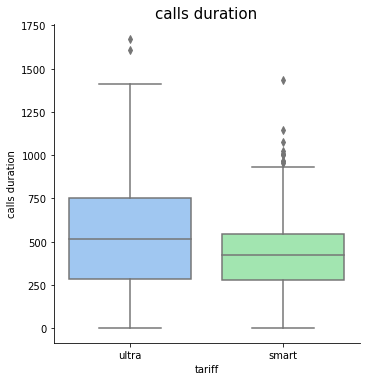

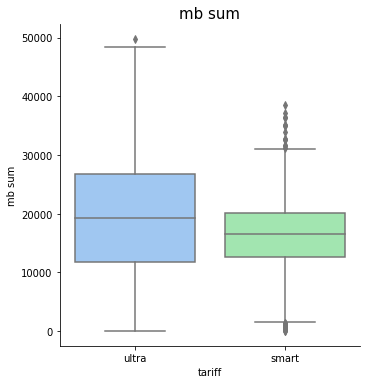

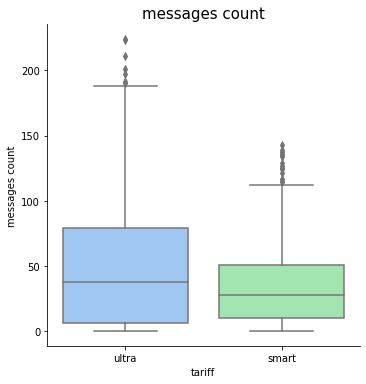

In [42]:
for column in ['calls duration', 'mb sum', 'messages count']:
    sns.catplot(x='tariff', y=column, data=data_pivot, kind='box')
    plt.title(column, fontsize=15)

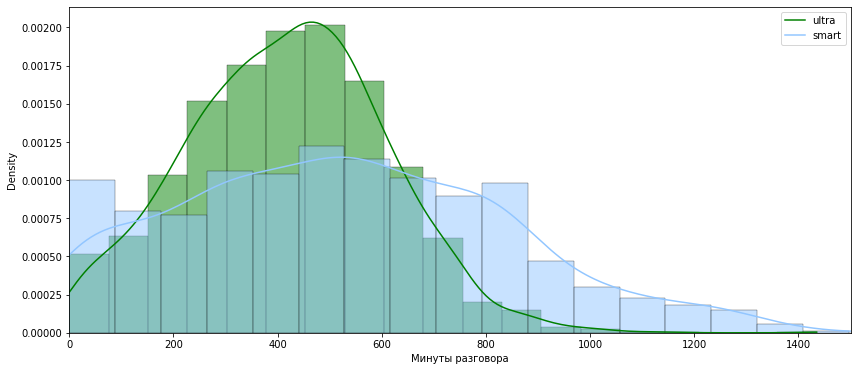

In [43]:
plt.figure(figsize=(14,6))
smart = data_pivot.query('tariff == "smart"')
ultra = data_pivot.query('tariff == "ultra"')
sns.histplot(smart['calls duration'], kde=True, bins=19, stat="density", linewidth=0.3, color='green')
sns.histplot(ultra['calls duration'], kde=True, bins=19, stat="density", linewidth=0.3)

plt.xlim(0,1500)
plt.xlabel('Минуты разговора')
plt.legend(['ultra', 'smart'])
plt.show()

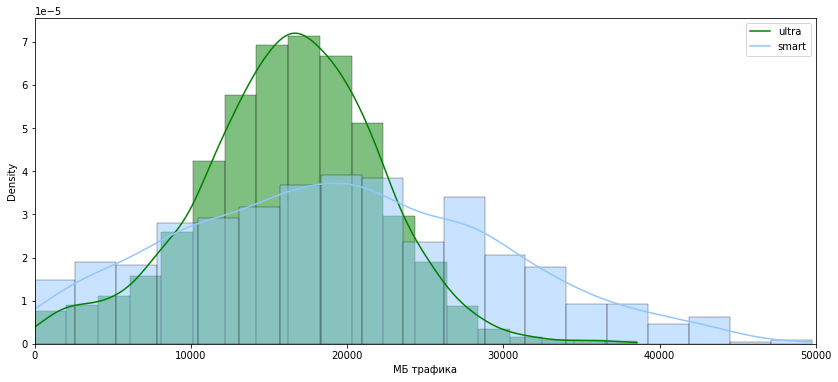

In [44]:
plt.figure(figsize=(14,6))
sns.histplot(smart['mb sum'], kde=True, bins=19, stat="density", linewidth=0.3, color='green')
sns.histplot(ultra['mb sum'], kde=True, bins=19, stat="density", linewidth=0.3)

plt.xlim(0, 50000)
plt.xlabel('МБ трафика')
plt.legend(['ultra', 'smart'])
plt.show()

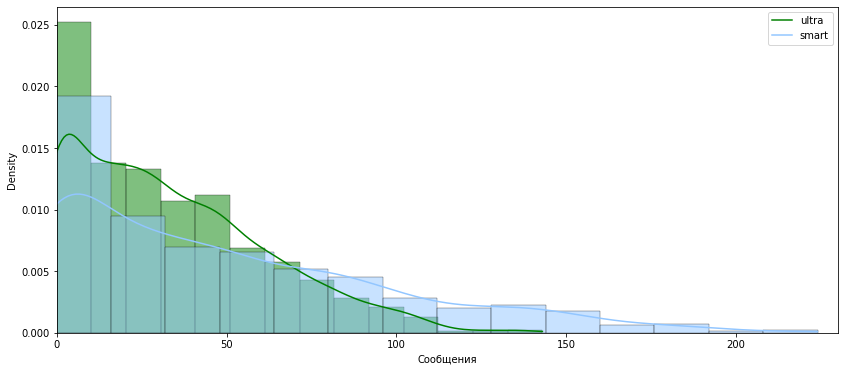

In [45]:
plt.figure(figsize=(14,6))
sns.histplot(smart['messages count'], kde=True, bins=14, stat="density", linewidth=0.3, color='green')
sns.histplot(ultra['messages count'], kde=True, bins=14, stat="density", linewidth=0.3)

plt.xlim(0, 230)
plt.xlabel('Сообщения')
plt.legend(['ultra', 'smart'])
plt.show()

Какую общую выручку принесли пользователи разных тарифов:

In [46]:
data_pivot.pivot_table(index='tariff', values='total revenue', aggfunc='sum')

,total revenue
tariff,
smart,2875351.0
ultra,2039100.0


In [47]:
print('Пользователей смарт:', len(data_medians.query('tariff == "smart"')))
print('Пользователей ультра:', len(data_medians.query('tariff == "ultra"')))

Пользователей смарт: 351
Пользователей ультра: 149


#### Промежуточные выводы:

- По боксплотам можно более точно увидеть распределение, и заметить что размахи и дисперсия в тарифе ультра больше, чем в смарт.
- Визуально можно также подтвердить гипотезы выдвинутые выше - Пользователи ультра в среднем активнее пользуются услугами связи, чем пользователи тарифа смарт.
- Однако, больше выручки принесли пользователи тарифа смарт, хотя их и больше в выборке, чем пользователей ультра.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Распределения изучены верно, выводы на месте, графики отличные, молодец🔥</div>

## Проверка гипотез:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка 1 гипотезы:

*H₀* - Средняя выручка пользователей тарифа смарт равна средней выручке пользователей тарифа ультра.

*H₁* - Средняя выручка пользователей тарифа смарт отличается от средней выручки пользователей тарифа ультра.

α = 5% (Критический уровень статистической значимости)

In [48]:
# Зададим альфу
alpha= 0.05

# Создадим удобные "ссылки"
t_smart = data_pivot.query('tariff=="smart"')['total revenue']
t_ultra = data_pivot.query('tariff=="ultra"')['total revenue']

Выясним, сильно ли отличаются дисперсии генеральных выборок:

In [49]:
print('Дисперсия смарт:', t_smart.var(ddof=1))
print('Дисперсия ультра:', t_ultra.var(ddof=1))

Дисперсия смарт: 669785.7080064242
Дисперсия ультра: 141516.7450786183


Дисперсии сильно различаются, потому далее будем учитывать это при проверке гипотез:

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Грамотная подготовка данных к тесту, молодец👍
</div>





In [50]:
results = st.ttest_ind(t_smart, t_ultra, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Выведем таблицу для наглядности:

In [51]:
data_pivot.pivot_table(index='tariff', values='total revenue', aggfunc='mean')

,total revenue
tariff,
smart,1289.973531
ultra,2070.152284


Вывод:

- Ещё на этапе анализа мы могли заметить, что выручка пользователей разных тарифов действительно отличается, что и подтвердило наше исследование.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Согласен👍</div>

### Проверка 2 гипотезы:

H₀ - Средняя выручка пользователей из других городов равна средней выручки пользователей из г. Москва.

H₁ - Средняя выручка пользователей из г. Москвы отличается от средней выручке пользователей из городов.

α = 5% (Критический уровень статистической значимости)

In [52]:
# Создадим удобные "ссылки"
moscow = data_pivot.query('city == "Москва"')['total revenue']
city = data_pivot.query('city != "Москва"')['total revenue']

Выясним, сильно ли отличаются дисперсии:

In [53]:
print('Дисперсия пользователей из Москвы:', moscow.var(ddof=1))
print('Дисперсия пользователей из остальных городов:', city.var(ddof=1))

Дисперсия пользователей из Москвы: 565636.467011886
Дисперсия пользователей из остальных городов: 654137.6285218114


Дисперсии отличаются, потому также учтём это во время проверки гипотез:

In [54]:
results = st.ttest_ind(moscow, city, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Также выведем таблицу:

In [55]:
cities = data_pivot.copy()
cities.loc[cities.loc[:,'city'] != 'Москва', 'city'] = 'Остальные города'
cities.pivot_table(index='city', values='total revenue', aggfunc='mean')

,total revenue
city,
Москва,1546.713584
Остальные города,1524.936227


Вывод:

- Полученные данные означают, что с вероятностью в 44% сравнивая выручки мы бы получали схожие значения.
- Выручка пользователей из Москвы практически не отличается от выручки пользователей из остальных городов, нулевая гипотеза подтвердилась.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> С тестами все отлично:

- гипотезы сформулированы

- средние посчитаны

- результаты теста интерпретированы

Молодец👍</div>

## Общий вывод:

**В данном исследовании мы провели большую работу по анализу данных, в целом, данные были достаточно "чистыми", и нам не пришлось много работать над предобработкой этих данных. В самой предобработке мы удалили некоторые значения, которые не были нужны для проведения исследования, и добавили дополнительные расчетные таблицы. Вот основные выводы, которые мы получили во время работы над проектом:**

- Медианой звонков в тарифе смарт у пользователей: 422 минут. У ультра: 518
- Медианой трафика в тарифе смарт у пользователей: ~16.5 GB. У ультра: 19.3 GB.
- Медианой СМС в тарифе смарт у пользователей: 28 СМС. У ультра: 38 СМС.
- Пользователи тарифа ультра в целом более охотно пользуются услугами оператора, в отличии от абонентов смарт, также можно заметить большую дисперсию именно в тарифе ультра.
- Если считать по лимитам тарифов, можно обнаружить, что в тарифе ультра остаётся 2482 минуты, 962 СМС и 10.7 ГБ до лимита, за которые абоненты платят. В тарифе смарт: остаётся 78 минут, 12 СМС, и также приходится докупать в районе 1.5 ГБ трафика среднестатистическому пользователю.
- Всего из выборки выручки принесли пользователи тарифа смарт: 2 млн. 900 тыс., в то время как в ультра: ~2 млн. Хотя в среднем отношении пользователи ультра куда более перспективное направление (2073р vs 1305р у смарт)
- Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" подтвердилась.
- Гипотеза: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов." оказалась ложной, и подтвердить её не удалось

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Отличный вывод, теперь работа логчески завершена и мы можем понять суть исследования🔥</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b>Мне очень понравилась твоя работа. Все рассуждения верные, очень логичные и осмысленные. Ничего лишнего, всё по полкам. Ты подробно разбираешься в деталях, для будущего аналитика это очень важная черта😊

Проект еще нужно немного доработать, а именно:

- убрать округление гигабайтов на этапе предобработки
        
- исправить блок изучения распределений
    
Остальные замечания оставляю на твое усмотрение😉

Жду твою работу на повторное ревью.
    
[Интересная статья про визуализацию](https://habr.com/ru/company/netologyru/blog/341364/)
    
[Тут есть полезные приемы Markdown](https://paulradzkov.com/2014/markdown_cheatsheet/)

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Доброго времни суток :) Николай, огромное спасибо тебе за качественную проверку проекта, было очень приятно читать комментарии. Я очень извиняюсь за задержку с своей стороны, что не смог сразу отправить проект на повторное ревью из-за работы :( Надеюсь на понимание! (За ссылки отдельное спасибо!)
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Отличная работа, проект принимаю. Могу с уверенностью сказать - ты хорошо владеешь пройденным материалом. Мне понравилась твоя реакция на обратную связь, комментарии даже к желтым замечаниям. Желаю удачи в дальнейшей учебе🔥 </div>